In [44]:
import pandas as pd
import plotnine as pn
from ipywidgets import interact, widgets
from IPython.display import display

# Load the dataset
file_path = r"C:\Users\Ilike\CSCI385\Final_Project\Hate Crime 2012 - 2022.csv"
data = pd.read_csv(file_path)

# Define plotting function
def create_histogram(category, title, color_scheme):
    filtered_data = data[data['MostSeriousBiasType'] == category]
    plot = (
        pn.ggplot(filtered_data)
        + pn.aes(x='ClosedYear')
        + pn.geom_bar(stat='count', width=0.8, fill=color_scheme if isinstance(color_scheme, str) else None)
        + pn.labs(
            title=title,
            x='Year',
            y='Number of Hate Crimes'
        )
        + pn.theme_bw()
        + pn.scale_x_continuous(
            breaks=list(range(2012, 2023)),
            labels=[str(year) for year in range(2012, 2023)],
            expand=(0, 0)
        )
        + (pn.scale_fill_manual(values=color_scheme) if isinstance(color_scheme, list) else None)
        + pn.theme(
            figure_size=(12, 6),
            plot_title=pn.element_text(size=16, ha='center', weight='bold'),
            axis_title=pn.element_text(size=14),
            axis_text=pn.element_text(size=12),
            panel_grid_major=pn.element_line(color='gray', size=0.2),
            panel_grid_minor=pn.element_line(color='gray', size=0.1),
            panel_border=pn.element_rect(color='black', size=1),
            legend_position='none'
        )
    )
    return plot

# Function to display the selected histogram
def display_histogram(histogram_type):
    if histogram_type == "Race/Ethnicity/Ancestry":
        display(create_histogram(
            "Race/Ethnicity/Ancestry",
            "Distribution of Hate Crimes Based on Race/Ethnicity/Ancestry Over Time (2012-2022)",
            "#add8e6"  # Light blue
        ))
    elif histogram_type == "LGBTQ":
        display(create_histogram(
            "Sexual Orientation",
            "Distribution of Hate Crimes Against LGBTQ Community Over Time (2012-2022)",
            "#F2BAC9" # Pink
        ))
    elif histogram_type == "Religion":
        display(create_histogram(
            "Religion",
            "Distribution of Hate Crimes Based on Religion Over Time (2012-2022)",
            "#DC602E"  # Deep orange
        ))

# Dropdown widget
dropdown = widgets.Dropdown(
    options=["Race/Ethnicity/Ancestry", "LGBTQ", "Religion"],
    value="Race/Ethnicity/Ancestry",
    description="Category:",
    style={'description_width': 'initial'}
)

# Interact with the dropdown
interact(display_histogram, histogram_type=dropdown)

interactive(children=(Dropdown(description='Category:', options=('Race/Ethnicity/Ancestry', 'LGBTQ', 'Religion…

<function __main__.display_histogram(histogram_type)>

In [5]:
import pandas as pd

# Load the datasets
hate_crime_data = pd.read_csv('Hate Crime 2012 - 2022.csv')
ncic_data = pd.read_csv('NCIC Code Jurisdiction List.csv')

# Merge the datasets to associate county names
merged_data = pd.merge(hate_crime_data, ncic_data, left_on='County', right_on='CntyCode', how='left')

# Summary statistics
total_crimes = hate_crime_data.shape[0]
bias_type_counts = hate_crime_data['MostSeriousBiasType'].value_counts().reset_index()
bias_type_counts.columns = ['BiasType', 'Count']  # Rename columns for clarity
top_counties = merged_data.groupby('County_y').size().sort_values(ascending=False).head(5)
top_counties_df = top_counties.reset_index(name='HateCrimeCount')  # Convert to DataFrame

# Minority statistics
minority_biases = [
    "Anti-Black or African American",
    "Anti-White",
    "Anti-Hispanic or Latino",
    "Anti-Multiple Races (Group)",
    "Anti-Asian",
    "Anti-Other Race/Ethnicity/Ancestry",
    "Anti-Gay (Male)",
    "Anti-Transgender",
    "Anti-Lesbian/Gay/Bisexual or Transgender (Mixed Group)",
    "Anti-Citizenship Status",
    "Anti-Bisexual",
    "Anti-Jewish",
    "Anti-Arab",
    "Anti-Catholic"
]
minority_data = hate_crime_data[hate_crime_data['MostSeriousBias'].isin(minority_biases)]
minority_counts = minority_data['MostSeriousBias'].value_counts().reset_index()
minority_counts.columns = ['Bias', 'Count']  # Rename columns for clarity


In [6]:
# Display results
print(f"Total Hate Crimes: {total_crimes}")
print("\nHate Crimes by Bias Type:\n")
print(bias_type_counts.to_string(index=False))  # Print without index

Total Hate Crimes: 12706

Hate Crimes by Bias Type:

               BiasType  Count
Race/Ethnicity/Ancestry   7466
     Sexual Orientation   2662
               Religion   2088
   Gender Nonconforming    375
             Disability     63
                 Gender     52


In [7]:
print("\nTop 5 Counties with Most Hate Crimes:\n")
print(top_counties_df.to_string(index=False))  # Print without index


Top 5 Counties with Most Hate Crimes:

          County_y  HateCrimeCount
Los Angeles County            4918
  San Diego County            1000
Santa Clara County             835
    Alameda County             707
     Orange County             646


In [8]:
print("\nHate Crimes Against Minorities:\n")
print(minority_counts.to_string(index=False))  # Print minority data without index


Hate Crimes Against Minorities:

                                                  Bias  Count
                        Anti-Black or African American   3753
                                       Anti-Gay (Male)   1725
                               Anti-Hispanic or Latino   1324
                                           Anti-Jewish   1249
                                            Anti-Asian    707
Anti-Lesbian/Gay/Bisexual or Transgender (Mixed Group)    611
                                            Anti-White    602
                    Anti-Other Race/Ethnicity/Ancestry    478
                                      Anti-Transgender    339
                           Anti-Multiple Races (Group)    293
                                             Anti-Arab    184
                                         Anti-Catholic    121
                               Anti-Citizenship Status     75
                                         Anti-Bisexual     34


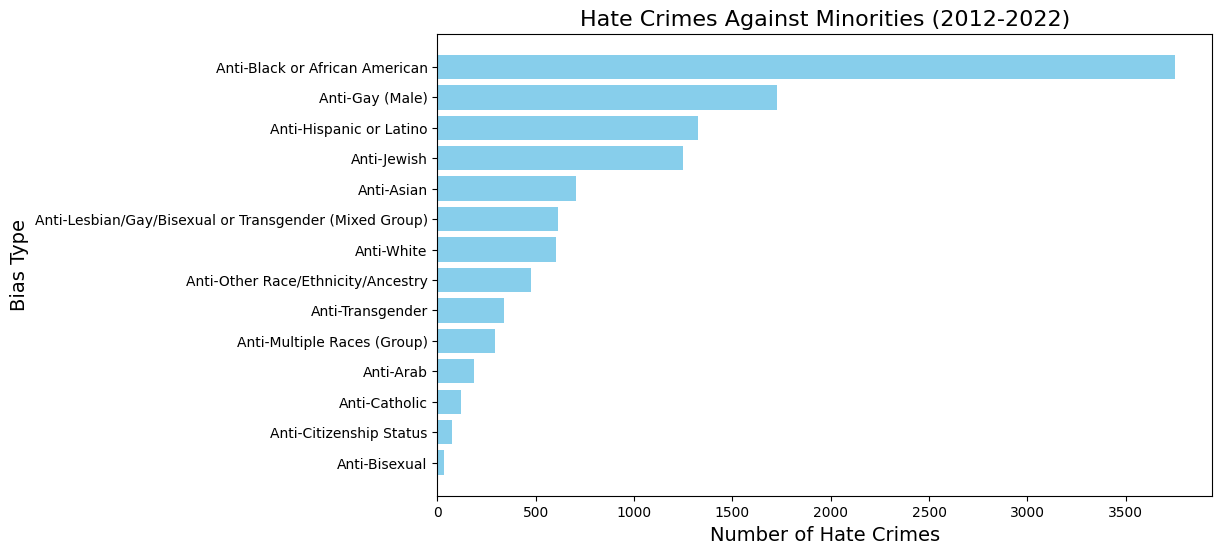

In [9]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(minority_counts['Bias'], minority_counts['Count'], color='skyblue')
plt.title('Hate Crimes Against Minorities (2012-2022)', fontsize=16)
plt.xlabel('Number of Hate Crimes', fontsize=14)
plt.ylabel('Bias Type', fontsize=14)
plt.gca().invert_yaxis()  # Flip y-axis for better readability
plt.show()


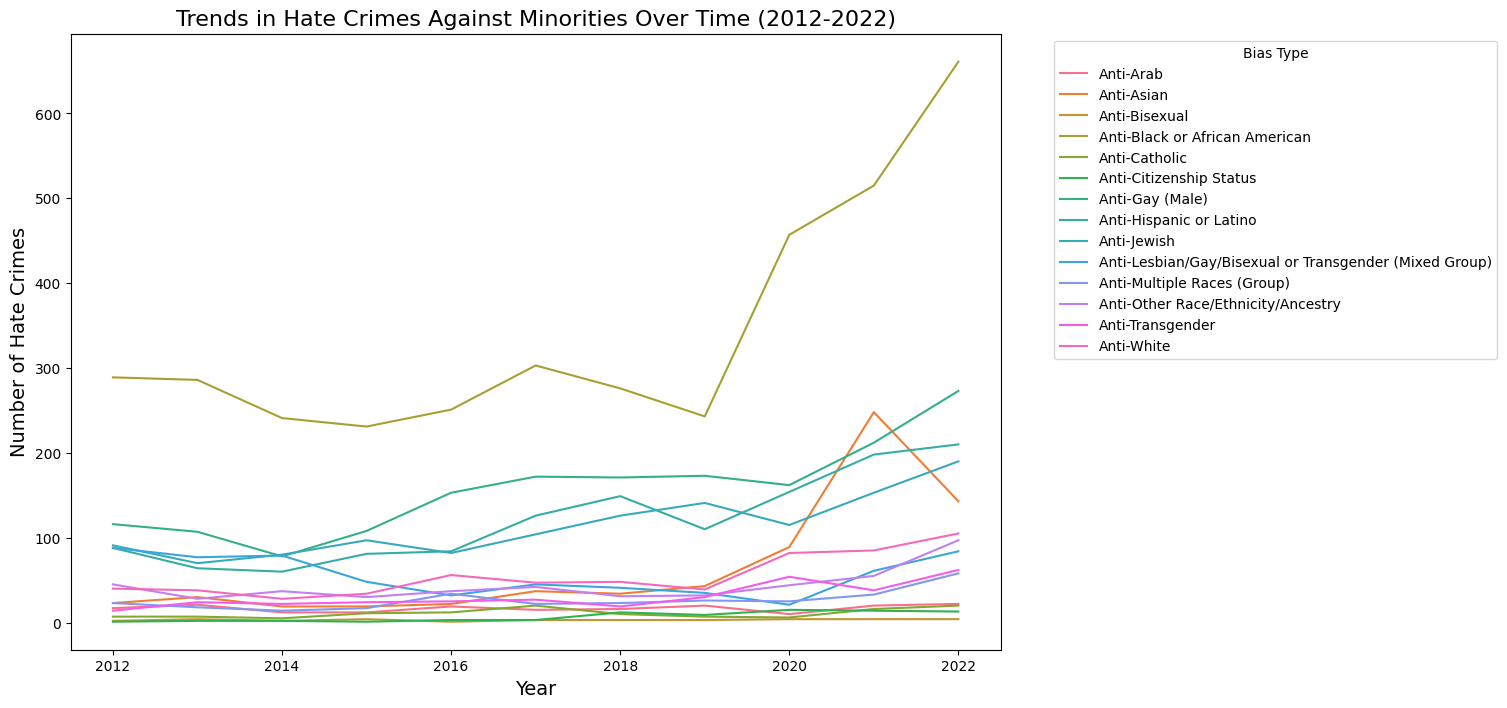

In [47]:
import seaborn as sns

trend_data = minority_data.groupby(['MostSeriousBias', 'ClosedYear']).size().reset_index(name='Count')


plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_data, x='ClosedYear', y='Count', hue='MostSeriousBias')
plt.title('Trends in Hate Crimes Against Minorities Over Time (2012-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Hate Crimes', fontsize=14)
plt.legend(title='Bias Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
